In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [6]:
df_1 = pd.read_csv("data/raw/anime.csv")
idx = 0
for i in df_1['episodes']:
    if i == "Unknown":
        df_1 = df_1.drop(index = idx)
    idx+=1
df_1 = df_1.dropna() 

In [51]:
df_2 = pd.read_csv("data/raw/rating.csv")
df_2 = df_2.dropna()

In [12]:
df_1.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [64]:
df_1.episodes = df_1.episodes.astype(int)

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 84,
 85,
 86,
 87,
 88,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 108,
 109,
 110,
 112,
 114,
 115,
 117,
 119,
 120,
 124,
 125,
 127,
 128,
 130,
 132,
 136,
 137,
 140,
 142,
 143,
 145,
 147,
 148,
 150,
 151,
 153,
 154,
 156,
 161,
 162,
 163,
 164,
 167,
 170,
 172,
 175,
 178,
 180,
 182,
 191,
 192,
 193,
 195,
 199,
 200,
 201,
 203,
 220,
 224,
 225,
 237,
 240,
 243,
 260,
 263,
 276,
 283,
 291,
 296,
 305,
 312,
 330,
 331,
 358,
 365,
 366,
 373,
 475,
 510,
 526,
 694,
 726,
 773,
 1006,
 1274,
 1306,
 1428,
 1471,
 1565,
 1787}

In [12]:
sum=0
count = 0
for i in range(7266775):
    if (df_2['anime_id'][i]== 20):
        if df_2['rating'][i] != -1:
            sum+=df_2['rating'][i]
            count+=1
print(sum)
print(count)
for i in range(len(df_1)):
    if (df_3['anime_id'][i]== 20):
        print(df_3['rating'][i])

162703
20620
7.81


KeyError: 2647

In [ ]:
df_1.info()
df_3.info()

In [11]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11006 entries, 0 to 11432
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  11006 non-null  int64  
 1   name      11006 non-null  object 
 2   genre     11006 non-null  object 
 3   type      11006 non-null  object 
 4   episodes  11006 non-null  object 
 5   rating    11006 non-null  float64
 6   members   11006 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 945.9+ KB


In [10]:
(1-(7.81/7.89))*100

1.0139416983523497

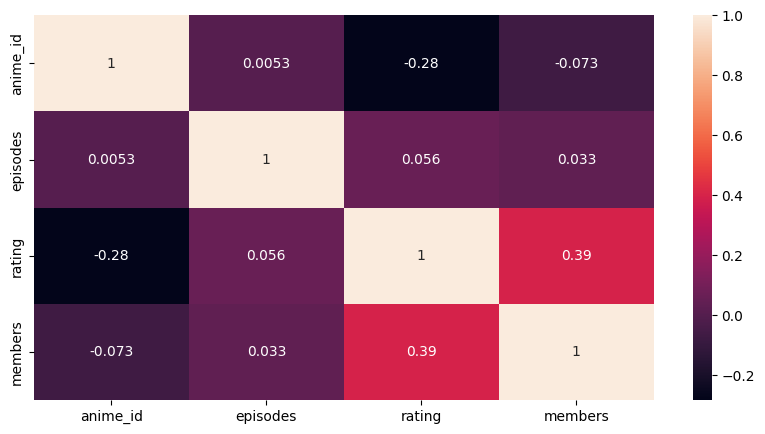

In [67]:
corr = df_1.corr()
fig, ax = plt.subplots(figsize=(10, 5))
ax = sb.heatmap(corr, annot=True)
plt.show()

In [20]:
df_1.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [71]:
type = df_1['type']
type_set = set(type)

df_1.type = pd.Categorical(df_1.type)
df_1 = df_1.assign(type=df_1.type.cat.codes)

In [72]:
type = df_3['type']
type_set = set(type)

df_3.type = pd.Categorical(df_3.type)
df_3 = df_3.assign(type=df_3.type.cat.codes)

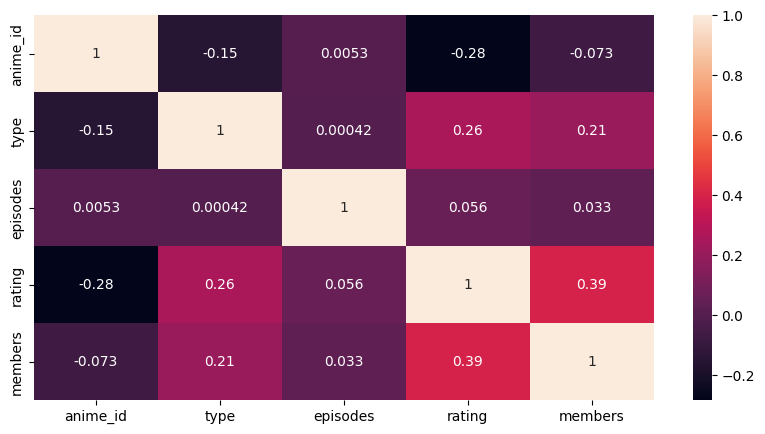

In [73]:
corr = df_1.corr()
fig, ax = plt.subplots(figsize=(10, 5))
ax = sb.heatmap(corr, annot=True)
plt.show()

In [34]:
df_1['episodes'].unique()

array([1, 64, 51, 24, 10, 148, 110, 13, 201, 25, 22, 75, 4, 26, 12, 27,
       43, 74, 2, 11, 99, 39, 101, 47, 50, 62, 33, 112, 23, 3, 94, 6, 14,
       7, 40, 15, 203, 77, 8, 291, 120, 102, 96, 38, 79, 175, 103, 70,
       153, 45, 5, 21, 52, 28, 145, 36, 69, 60, 178, 114, 35, 61, 34, 109,
       20, 9, 49, 366, 97, 48, 78, 358, 104, 167, 161, 42, 373, 220, 46,
       17, 1787, 73, 147, 127, 16, 19, 142, 98, 150, 37, 76, 53, 124, 29,
       115, 224, 44, 93, 154, 92, 67, 172, 86, 30, 276, 59, 72, 330, 41,
       105, 128, 137, 55, 58, 65, 243, 193, 18, 191, 180, 91, 192, 54, 66,
       'Unknown', 182, 32, 164, 100, 56, 296, 31, 694, 95, 68, 117, 151,
       130, 87, 63, 170, 119, 84, 108, 156, 140, 331, 305, 510, 200, 88,
       1471, 526, 143, 726, 136, 237, 1428, 365, 163, 283, 71, 260, 199,
       225, 312, 240, 195, 1306, 1565, 773, 1274, 90, 475, 263, 85, 1006,
       80, 162, 132, 125, '1', '4', '2', '3', '5', '6'], dtype=object)

In [36]:
for i in range(11359):
    try:
        df_1['episodes'][i] = int(df_1['episodes'][i])
    except:
        pass

/tmp/ipykernel_4677/3037382105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['episodes'][i] = int(df_1['episodes'][i])


In [37]:
df_1['episodes'] = df_1['episodes'].astype(int)

ValueError: invalid literal for int() with base 10: 'Unknown'

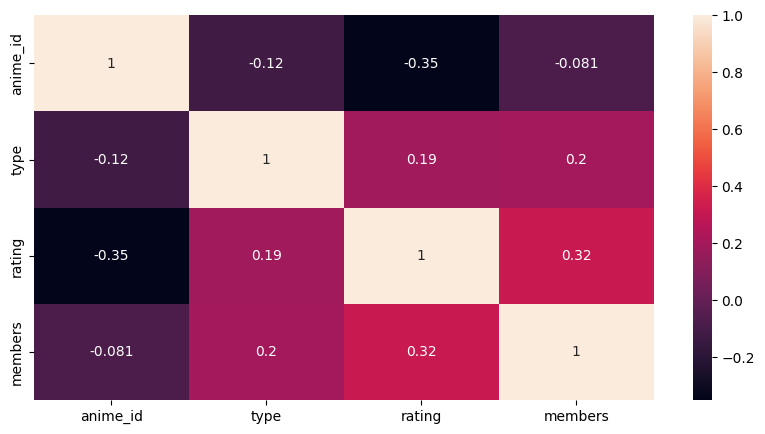

In [23]:
corr = df_1.corr()
fig, ax = plt.subplots(figsize=(10, 5))
ax = sb.heatmap(corr, annot=True)
plt.show()

In [144]:
sum_str = []
for i in range(11179):
    try:
        str = df_1['genre'][i].split(', ')
        sum_str += str
    except:
        pass
        

In [38]:
print(sorted(list(set(sum_str))))

['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri']


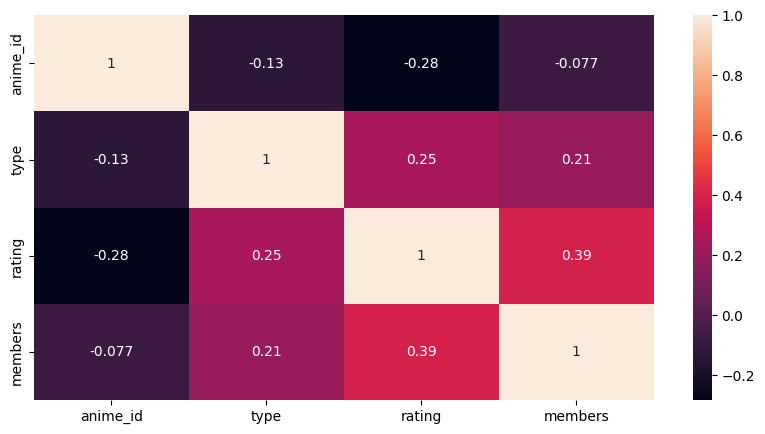

In [17]:
corr = df_3.corr()
fig, ax = plt.subplots(figsize=(10, 5))
ax = sb.heatmap(corr, annot=True)
plt.show()

In [41]:
set_list = sorted(list(set(sum_str)))
for i in range(11179):
    try:
        binar_genre = [0]*43
        str_genre = df_1['genre'][i].split(', ')
        for j in str_genre:
            binar_genre[set_list.index(j)] = 1
        df_1['genre'][i] = binar_genre
        print(i)
    except:
        pass

/tmp/ipykernel_7263/2082323635.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['genre'][i] = binar_genre


2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
2690
2691
2692
2693
2694
2695
2696
2697
2698
2699
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712
2713
2714
2715
2716
2717
2718
2719
2720
2721
2722
2723
2724
2725
2726
2727
2728
2729
2730
2731
2732
2733
2734
2735
2736
2737
2738
2739
2740
2741
2742
2743
2744
2745
2746
2747
2748
2749
2750
2751
2752
2753
2754
2755
2756
2757
2758
2759
2760
2761
2762
2763
2764
2765
2766
2767
2768
2769
2770
2771
2772
2773
2774
2775
2776
2777
2778
2779
2780
2781
2782
2783
2784
2785
2786
2787
2788
2789
2790
2791
2792
2793
2794
2795
2796
2797
2798
2799
2800
2801
2802
2803
2804
2805
2806
2807
2808
2809
2810
2811
2812
2813
2814
2815
2816
2817
2818
2819
2820
2821
2822
2823
2824
2825
2826
2827
2828
2829
2830
2831
2832
2833
2834
2835
2836
2837
2838
2839
2840
2841
2842
2843
2844
2845
2846
2847


4709
4710
4711
4712
4713
4714
4715
4716
4717
4718
4719
4720
4721
4722
4723
4724
4725
4726
4727
4728
4729
4730
4731
4732
4733
4734
4735
4736
4737
4738
4739
4740
4741
4742
4743
4744
4745
4746
4747
4748
4749
4750
4751
4752
4753
4754
4755
4756
4757
4758
4759
4760
4761
4762
4763
4764
4765
4766
4767
4768
4769
4770
4771
4772
4773
4774
4775
4776
4777
4778
4779
4780
4781
4782
4783
4784
4785
4786
4787
4788
4789
4790
4791
4792
4793
4794
4795
4796
4797
4798
4799
4800
4801
4802
4803
4804
4805
4806
4807
4808
4809
4810
4811
4812
4813
4814
4815
4816
4817
4818
4819
4820
4821
4822
4823
4824
4825
4826
4827
4828
4829
4830
4831
4832
4833
4834
4835
4836
4837
4838
4839
4840
4841
4842
4843
4844
4845
4846
4847
4848
4849
4850
4851
4852
4853
4854
4855
4856
4857
4858
4859
4860
4861
4862
4863
4864
4865
4866
4867
4868
4869
4870
4871
4872
4873
4874
4875
4876
4877
4878
4879
4880
4881
4882
4883
4884
4885
4886
4887
4888
4889
4890
4891
4892
4893
4894
4895
4896
4897
4898
4899
4900
4901
4902
4903
4904
4905
4906
4907
4908


6506
6507
6508
6509
6510
6511
6512
6513
6514
6515
6516
6517
6518
6519
6520
6521
6522
6523
6524
6525
6526
6527
6528
6529
6530
6531
6532
6533
6534
6535
6536
6537
6538
6539
6540
6541
6542
6543
6544
6545
6546
6547
6549
6550
6551
6552
6553
6554
6555
6556
6557
6558
6559
6560
6561
6562
6563
6564
6565
6566
6567
6568
6569
6570
6571
6572
6573
6574
6575
6576
6577
6578
6579
6580
6581
6582
6583
6584
6585
6586
6587
6588
6589
6590
6591
6592
6593
6594
6595
6596
6597
6598
6599
6600
6601
6602
6603
6604
6605
6606
6607
6608
6609
6610
6611
6612
6613
6614
6615
6616
6617
6618
6619
6620
6621
6622
6623
6624
6625
6626
6627
6628
6629
6630
6631
6632
6633
6634
6635
6636
6637
6638
6639
6640
6641
6642
6643
6644
6645
6646
6647
6648
6649
6650
6651
6652
6653
6654
6655
6656
6657
6658
6659
6660
6661
6662
6663
6664
6665
6666
6667
6668
6669
6670
6671
6672
6673
6674
6675
6676
6677
6678
6679
6680
6681
6682
6683
6684
6685
6686
6687
6688
6689
6690
6691
6692
6693
6694
6695
6696
6697
6698
6699
6700
6701
6702
6703
6704
6705
6706


8319
8320
8321
8322
8323
8324
8325
8326
8327
8328
8329
8330
8331
8332
8333
8334
8335
8336
8338
8339
8340
8341
8342
8343
8344
8345
8346
8347
8348
8349
8350
8351
8352
8354
8355
8356
8357
8358
8359
8360
8361
8362
8363
8364
8365
8366
8367
8368
8369
8370
8371
8372
8373
8374
8375
8376
8377
8378
8379
8380
8381
8382
8383
8384
8385
8386
8387
8388
8389
8390
8391
8392
8393
8394
8395
8396
8397
8398
8399
8400
8401
8402
8403
8404
8405
8406
8407
8408
8409
8410
8411
8412
8413
8414
8415
8416
8417
8418
8419
8420
8421
8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521


10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10223
10224
10225
10226
10227
10228
10230
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10256
10258
10259
10260
10261
10262
10263
10264
10265
10266
10267
10268
10269
10270
10271
10272
10273
10274
10275
10276
10277
10278
10279
10281
10282
10283
10285
10286
10287
10288
10289
10290
10291
10292
10293
10294
10295
10297
10298
10299
10300
10302
10303
10304
10305
10306
10307
10308
10309
10310
10311
10312
10313
10314
10315
10316
10318
10319
10320
10321
10322
10323
10324
10325
10326
10327
10329
10330
10331
10332
10333
10334
1033

[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [74]:
genre = df_1['genre']
genre = set(genre)

df_1.genre = pd.Categorical(df_1.genre)
df_1 = df_1.assign(genre=df_1.genre.cat.codes)

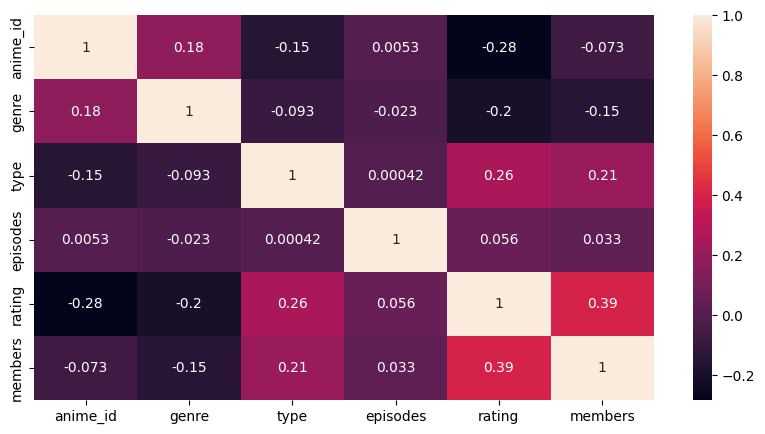

In [75]:
corr = df_1.corr()
fig, ax = plt.subplots(figsize=(10, 5))
ax = sb.heatmap(corr, annot=True)
plt.show()

In [55]:
df_1['rating'] = df_1['rating'].astype(float)
df_1['rating'].unique()

array([ 9.37,  9.26,  9.25,  9.17,  9.16,  9.15,  9.13,  9.11,  9.1 ,
        9.06,  9.05,  9.04,  8.98,  8.93,  8.92,  8.88,  8.84,  8.83,
        8.82,  8.81,  8.8 ,  8.78,  8.77,  8.76,  8.75,  8.74,  8.73,
        8.72,  8.71,  8.69,  8.68,  8.67,  8.66,  8.65,  8.64,  8.62,
        8.61,  8.6 ,  8.59,  8.58,  8.57,  8.56,  8.55,  8.54,  8.53,
        8.52,  8.51,  8.5 ,  8.49,  8.48,  8.47,  8.46,  8.45,  8.44,
        8.43,  8.42,  8.41,  8.4 ,  8.39,  8.38,  8.37,  8.36,  8.35,
        8.34,  8.33,  8.32,  8.31,  8.3 ,  8.29,  8.28,  8.27,  8.26,
        8.25,  8.24,  8.23,  8.22,  8.21,  8.2 ,  8.19,  8.18,  8.17,
        8.16,  8.15,  8.14,  8.13,  8.12,  8.11,  8.1 ,  8.09,  8.08,
        8.07,  8.06,  8.05,  8.04,  8.03,  8.02,  8.01,  8.  ,  7.99,
        7.98,  7.97,  7.96,  7.95,  7.94,  7.93,  7.92,  7.91,  7.9 ,
        7.89,  7.88,  7.87,  7.86,  7.85,  7.84,  7.83,  7.82,  7.81,
        7.8 ,  7.79,  7.78,  7.77,  7.76,  7.75,  7.74,  7.73,  7.72,
        7.71,  7.7 ,

In [19]:
df_1.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [62]:
for i in range(11433):
    if (df_1['rating'][i] == None):
        df_1['rating'][i] = 0.0
    else: 
        df_1['rating'][i] = df_1['rating'][i]

/tmp/ipykernel_10012/38231317.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['rating'][i] = df_1['rating'][i]


In [16]:
df_3.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [10]:
count = 0
for i in df_1['rating'].isnull():
    if i == True:
        df_1['rating'][count] = (0).astype(float)
    count+=1

In [15]:
df_1.loc[(df_1['rating'].isnull())] = 0;

In [89]:
df_1['anime_id'] = sorted(df_1['anime_id'])

In [94]:
df_1.head(30)

,anime_id,name,genre,type,episodes,rating,members
0,1,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,6,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,7,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,8,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,15,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,16,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,17,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,18,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,19,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


<AxesSubplot:xlabel='rating', ylabel='anime_id'>

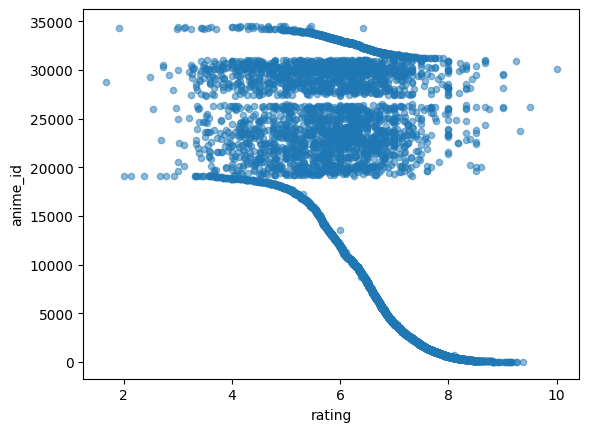

In [96]:
df_1.plot(kind = "scatter", x ="rating", y = "anime_id", alpha = 0.5)

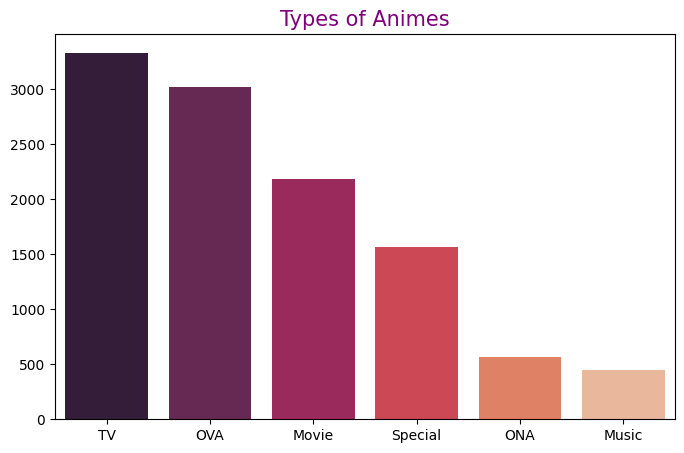

In [114]:
animetypes = df_1['type'].value_counts(dropna=False)

plt.figure(figsize=(8,5))
sb.barplot(x=animetypes.index,y=animetypes.values, palette="rocket")
plt.title('Types of Animes',color = 'purple',fontsize=15)
plt.show()

<AxesSubplot:xlabel='rating', ylabel='members'>

<Figure size 1000x1100 with 0 Axes>

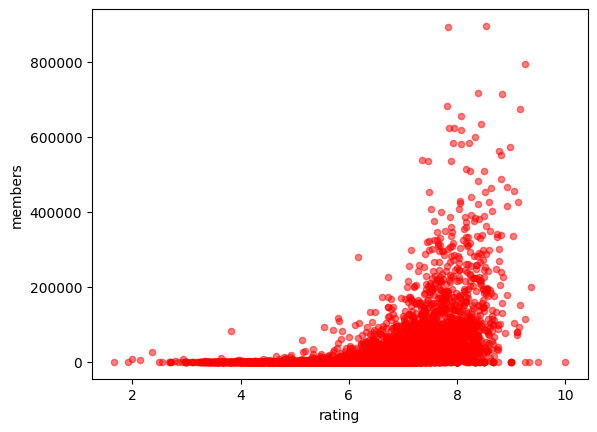

In [124]:
plt.figure(figsize=(10,11))
df_1.plot(kind = "scatter", x ="rating", y = "members", alpha = 0.5, color = "red")


In [17]:
df = df_1
sum_str = []
for i in df_1.genre:
    str = i.split(', ')
    sum_str += str
    
genres=sorted(list(set(sum_str)))
print(f' there are {len(genres)} unique genres, here is complete list: \n {genres}')
for genre in genres:
    encoding = [genre in i for i in df.genre]
    df["genre_"+ genre] = encoding

 there are 43 unique genres, here is complete list: 
 ['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri']


In [23]:
Number =[]
AvgRating = []
TotalMembers = []
for t in genres:
    Number.append(df.loc[df.genre.str.contains(t)==True]['name'].count())
    AvgRating.append(df.loc[df.genre.str.contains(t)==True]['rating'].mean())
    TotalMembers.append(df.loc[df.genre.str.contains(t)==True]['members'].sum())

ComparisonGenre = pd.DataFrame({'Number':Number,'AverageRating':AvgRating,'TotalMembers':TotalMembers}, index=genres)
ComparisonGenre.dropna()
ComparisonGenre.sort_values('Number',ascending=False)
ComparisonGenre = ComparisonGenre.iloc[1:]
ComparisonGenre = ComparisonGenre.loc[(ComparisonGenre.Number>ComparisonGenre.Number.quantile(0.1))&(ComparisonGenre.TotalMembers>ComparisonGenre.TotalMembers.quantile(0.1))]
ComparisonGenre.all

<bound method NDFrame._add_numeric_operations.<locals>.all of                Number  AverageRating  TotalMembers
Adventure        2136       6.739714      41382974
Comedy           4200       6.642024      98056673
Demons            269       6.674238       8864710
Drama            1829       6.981137      51963380
Ecchi             591       6.666633      22659981
Fantasy          2080       6.669192      51525292
Game              154       6.786558       5756068
Harem             294       6.959082      18776611
Hentai           1013       6.158105       2703436
Historical        731       6.755034      10657295
Horror            334       6.429072      11981267
Kids             1455       6.129869       2647904
Magic             683       6.802460      19219451
Martial Arts      246       6.803699       6206515
Mecha             863       6.647683      13750586
Military          391       7.005064      11773750
Music             759       5.933267       5691894
Mystery           44

/tmp/ipykernel_7580/3596409055.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(y, rotation=90)
/tmp/ipykernel_7580/3596409055.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(y, rotation=90)


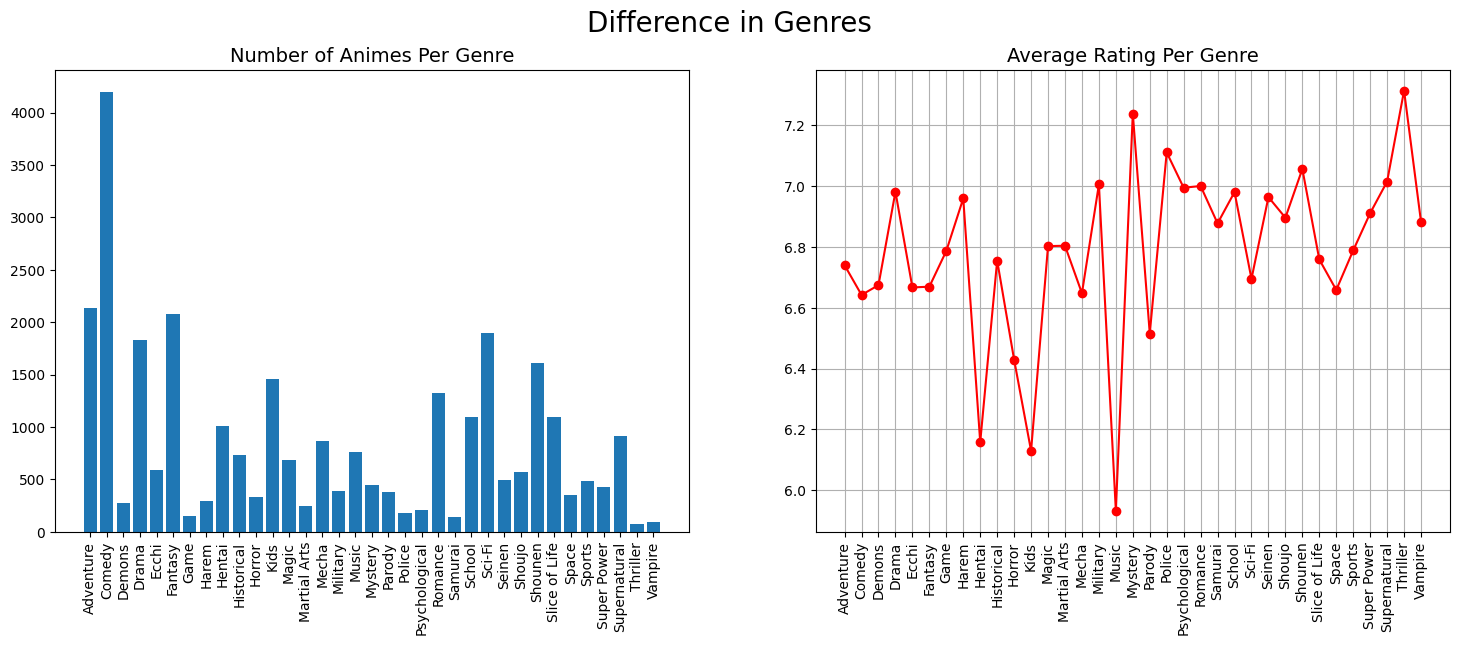

In [55]:
x1 = ComparisonGenre.Number
x2 = ComparisonGenre.AverageRating
x3 = ComparisonGenre.TotalMembers
y = ComparisonGenre.index

fig,[ax1,ax2] = plt.subplots(1,2,figsize=(18,6))
plt.suptitle('Difference in Genres',size=20)
ax1.set_xticklabels(y, rotation=90)
ax1.set_title('Number of Animes Per Genre',size = 14)
ax1.bar(y[:],x1[:])
ax2.set_title('Average Rating Per Genre',size = 14)
ax2.set_xticklabels(y, rotation=90)
ax2.plot(y,x2,color='r',marker='o')
ax2.grid()

/tmp/ipykernel_7580/3051298425.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(y, rotation=90)
